---
---

<center><h1> 📍 📍 Assignment 3 📍 📍</h1></center>

---

#### Project: Building Basic predictive models over the NYC Taxi Trip dataset.
- We have NYC Taxi Trip Dataset. This dataset contains information about the
taxi trips that took place in different parts of New York City and how much time did that trip take
to complete.

### Import libraries

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [2]:
# Loading dataset
data = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [3]:
#Checking shape of dataset
data.shape

(729322, 11)

In [4]:
# let's see first few rows
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


#### Independent Variables
- id — a unique identifier for each trip
- vendor_id — a code indicating the provider associated with the trip record
- pickup_datetime — date and time when the meter was engaged
- dropoff_datetime — date and time when the meter was disengaged
- passenger_count — the number of passengers in the vehicle (driver entered value)
- pickup_longitude — the longitude where the meter was engaged
- pickup_latitude — the latitude where the meter was engaged
- dropoff_longitude — the longitude where the meter was disengaged
- dropoff_latitude — the latitude where the meter was disengaged
- store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.
#### Target Variable
- trip_duration — duration of the trip in seconds

#### checking missing values in the data


In [5]:
##checking missing values in the data
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### Let's Convert Datetime variable

In [8]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])

### Now, let us extract and create new features from this datetime features we just created.


In [9]:
# hour of day of pickup
data['pickup_hour']=data['pickup_datetime'].dt.hour

# Weekday of pickup
data['pickup_day_no']=data['pickup_datetime'].dt.weekday

# month of pickup
data['pickup_month']=data['pickup_datetime'].dt.month

#### Creating a function to calculate distance

In [10]:
# Creating a function to calculate haversine distance
def haversine_vectorize(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    newlon = lon2 - lon1
    newlat = lat2 - lat1
    
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat2)*np.cos(lat2)*np.sin(newlon/2.0)**2
    
    dist = 2 * np.arcsin(np.sqrt(haver_formula))
    km = 6367 * dist #6367 for distance in km from miles use 3958
    return km

In [11]:
data['distance'] = haversine_vectorize(data['pickup_longitude'],data['pickup_latitude'],data['dropoff_longitude'],data['dropoff_latitude'])

#### Removing variable id, pickup_datetime,dropoff_datetime from dataset

In [12]:
# Removing variable id, pickup_datetime,dropoff_datetime and other unusal variables from dataset
data = data.drop(['id','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1)

#### Converting yes/no flag to 1 and 0

In [13]:
# Converting yes/no flag to 1 and 0
data['store_and_fwd_flag'] = 1 * (data.store_and_fwd_flag.values == 'Y')

In [14]:
data['store_and_fwd_flag'].value_counts()

0    725282
1      4040
Name: store_and_fwd_flag, dtype: int64

In [15]:
data.describe()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day_no,pickup_month,distance
count,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.000000
mean,1.535403,1.662055,0.005539,9.522291e+02,13.611698,3.049081,3.518410,3.438920
std,0.498745,1.312446,0.074221,3.864626e+03,6.402853,1.954470,1.680661,4.350196
min,1.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,3.970000e+02,9.000000,1.000000,2.000000,1.231915
50%,2.000000,1.000000,0.000000,6.630000e+02,14.000000,3.000000,4.000000,2.094382
75%,2.000000,2.000000,0.000000,1.075000e+03,19.000000,5.000000,5.000000,3.874134
max,2.000000,9.000000,1.000000,1.939736e+06,23.000000,6.000000,6.000000,1240.867579


#### Check Outlairs with the help of Z score

In [16]:
outliers =[]

def detect_outliers(trip_time):
    
    threshold = 3
    mean = np.mean(data['trip_duration'])
    std = np.std(data['trip_duration'])
    
    for i in trip_time:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
        return outliers

In [17]:
outlier_pt = detect_outliers(data['trip_duration'])

In [18]:
outlier_pt

[]

- We can see there is no any outleirs present in our dataset

## 1. Choose the most suitable evaluation metric and state why you chose it.

#### Answer:-
   - I think most suitable evaluation metric for this problem is RMSE "Root mean squre error".
   #### Why i chose RMSE?
   
   - The dataset has descrete value of trip duration.
   - And there is no any outliers present in our dataset.

## 2.Build a benchmark model for the given dataset.

### Shuffling and Creating Train and Test Set

In [6]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [7]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,N,657
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,N,195
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,N,840
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,N,398
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,N,682


In [8]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
546991,id2240736,1,2016-05-25 07:59:16,2016-05-25 08:05:02,1,-73.991364,40.732590,-74.000526,40.742283,N,346
43126,id1423404,1,2016-01-18 12:17:13,2016-01-18 12:21:13,2,-73.966225,40.768059,-73.967606,40.763073,N,240
641450,id1317268,2,2016-03-02 18:39:01,2016-03-02 18:50:12,1,-73.994926,40.766018,-74.004219,40.742523,N,671
611380,id3335546,1,2016-04-06 19:17:20,2016-04-06 19:18:03,1,-73.974388,40.793781,-73.976006,40.792339,N,43
62690,id2174190,2,2016-06-21 18:35:31,2016-06-21 18:40:56,3,-73.963440,40.798557,-73.979736,40.777878,N,325


### Simple Mean ( trip_duration)

In [9]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()

In [23]:
#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['trip_duration'] , test['simple_mean'])
simple_mean_error

621.9954570969938

### Mean trip_duration with respect to vendor_id

In [24]:
vendor_type = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
vendor_type

,trip_duration
vendor_id,
1,838.174354
2,1049.946134


In [25]:
# initializing new column to zero
test['vendor_type_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['vendor_id'].unique():
  # Assign the mean value corresponding to unique entry
  test['vendor_type_mean'][test['vendor_id'] == str(i)] = train['trip_duration'][train['vendor_id'] == str(i)].mean()

#### Calculating mean absolute error

In [26]:
#calculating mean absolute error
vendor_type_error = MAE(test['trip_duration'] , test['vendor_type_mean'] )
vendor_type_error

954.9334105467856

## Mean trip duration with respect to passenger_count

In [27]:
passenger_count_type = pd.pivot_table(train, values='trip_duration', index = ['passenger_count'], aggfunc=np.mean)
passenger_count_type

,trip_duration
passenger_count,
0,334.733333
1,919.236280
2,1000.159939
3,1034.393923
4,1028.731304
5,1078.708147
6,1080.694100


In [28]:
# initializing new column to zero
test['passenger_count_type_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['passenger_count_type_mean'][test['passenger_count'] == i] = train['trip_duration'][train['passenger_count'] == i].mean()

In [29]:
#calculating mean absolute error
passenger_count_type_error = MAE(test['trip_duration'] , test['passenger_count_type_mean'] )
passenger_count_type_error

622.5222915139927

### Mean trip duration with respect to pickup_month

In [30]:
data['pickup_month'].value_counts()

3    128316
4    125634
5    124201
2    119364
6    117406
1    114401
Name: pickup_month, dtype: int64

In [31]:
pickup_month_type = pd.pivot_table(train, values='trip_duration', index = ['pickup_month'], aggfunc=np.mean)
pickup_month_type

,trip_duration
pickup_month,
1,923.426647
2,893.883449
3,929.019227
4,960.466837
5,1003.304923
6,998.206506


In [32]:
# initializing new column to zero
test['pickup_month_type_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['pickup_month'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickup_month_type_mean'][test['pickup_month'] == i] = train['trip_duration'][train['pickup_month'] == i].mean()

In [33]:
#calculating mean absolute error
pickup_month_type_error = MAE(test['trip_duration'] , test['pickup_month_type_mean'] )
pickup_month_type_error

621.3077039791814

### Mean trip duration with respect to both passenger_count and pickup_month

In [34]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['pickup_month','passenger_count'], aggfunc = np.mean)
combo

trip_duration
pickup_month passenger_count               
1            0                   665.500000
             1                   902.443460
             2                   972.119736
             3                  1032.350339
             4                   837.537892
             5                   960.967052
             6                  1016.526299
2            0                    29.500000
             1                   866.885516
             2                   924.916527
             3                   851.770299
             4                  1031.645556
             5                  1079.661894
             6                  1011.967064
3            0                   320.000000
             1                   900.228797
             2                   934.195182
             3                  1027.290225
             4                  1058.248269
             5                  1160.489923
             6                   950.239395
4            0                   390.666667
             1                   925.330457
             2                  1014.714468
             3                  1030.927749
             4                  1039.166248
             5                  1113.182703
             6                  1087.375000
5            0                   188.166667
             1                   975.043781
             2                  1061.299541
             3                  1065.103391
             4                  1038.643744
             5                  1031.971786
             6                  1205.534557
6            1                   944.731242
             2                  1091.307670
             3                  1191.083291
             4                  1152.480687
             5                  1119.873734
             6                  1218.252399

In [35]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s2 = 'pickup_month'
s1 = 'passenger_count'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [36]:
#calculating mean absolute error
super_mean_error = MAE(test['trip_duration'] , test['Super_mean'] )
super_mean_error

954.9334105467856

## 3. Build a K-Nearest neighbours model for the given dataset and find the best value of K.

In [37]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day_no,pickup_month,distance
469114,2,1,0,657,10,5,5,2.282404
694852,2,5,0,195,18,4,1,0.738700
696324,1,1,0,840,0,6,5,9.010277
356496,1,1,0,398,10,5,6,1.187412
645318,1,3,0,682,10,6,4,4.308553


### Segregating variables: Independent and Dependent Variables

In [38]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 7), (729322,))

### Scaling the data (Using MinMax Scaler)

In [39]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [40]:
x = pd.DataFrame(x_scaled)

In [41]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing KNN Regressor

In [42]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [43]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     32067785.945103575


### Elbow for Classifier

In [44]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [45]:
#Defining K range
k = range(1,40,4)

In [46]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

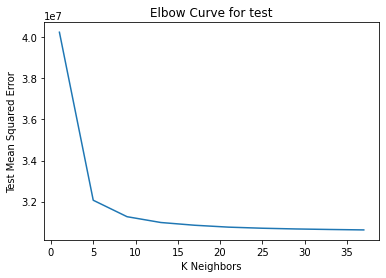

In [47]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [51]:
# Creating instance of KNN
reg = KNN(n_neighbors = 9)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     31267517.2408808


In [53]:
# Root mean square error
rmse = np.sqrt(k)
print('Test RMSE    ', rmse)

Test RMSE     5591.736513899846


## 4.Build a Linear model for the given dataset with regularisation. Attempt to interpret the variable coefficients of the Linear Model.